In [1]:
import numpy as np
import h5py
import os
import cv2
from sklearn.decomposition import PCA
import ggmm.gpu as ggmm

from sklearn import svm
from sklearn.metrics import accuracy_score


import pandas as pd
from pandas import HDFStore, DataFrame
import pickle
#import pdb

In [2]:
dataset_dir = '../dataset_h5/'
skipped_indices = []
filename = 'images_224_delta_1.5.h5'
test_filename = 'images_224.h5'

In [4]:
# try:
#     labels_train = np.load("labels_train.npy")
#     fv = np.load("fisher_vector.npy")
# except FileNotFoundError:
#     h5f = h5py.File(os.path.join(dataset_dir,filename),'r')
#     skipped_indices, fv = process_images(h5f['data'])
#     labels_train = load_labels(skipped_indices, 'labels_train')
#     np.save("labels_train.npy",labels_train )
#     np.save("fisher_vector.npy",fv )
# 
# classifier = train(fv,labels_train)
# pickle.dump( classifier, open( "classifier.p", "wb" ) ) 
classifier = pickle.load( open( "classifier_linearSVC.p", "rb" ) )
try:
    labels_test = np.load("labels_test.npy")
    fv_test = np.load("fisher_vector_test.npy")
except FileNotFoundError:
    h5f_test = h5py.File(os.path.join(dataset_dir,test_filename),'r')
    skipped_indices_test, fv_test = process_images(h5f_test['data_test'])
    labels_test = load_labels(skipped_indices_test, 'labels_test')
    np.save("labels_test.npy",labels_test )
    np.save("fisher_vector_test.npy",fv_test )


accuracy_score(labels_test, classifier.predict(fv_test))

NameError: name 'process_images' is not defined

In [42]:
import numpy as np
import h5py
import os
import cv2
from sklearn.decomposition import PCA
import ggmm.gpu as ggmm

from sklearn import svm
from sklearn.metrics import accuracy_score


import pandas as pd
from pandas import HDFStore, DataFrame
import pickle

from image_fisher_vector import ImageFisherVector as ifv

# classifier =  pickle.load( open( "classifier.p", "rb" ) )
# print("Loaded Classifier!")
# gmm = ifv.load_gmm()


# image = cv2.imread("model.png")
# image_features = ifv.extract_image_features(image)

# if image_features is not None and image_features.shape[0] >= 64:
# 	image_features = ifv.reduce_features(image_features)
# else:
# 	print("Not enough features found by SIFT")


# fv = fisher_vector(image_features,gmm)

# classifier.decision_function(fv.reshape(1, -1))

#fv_test = np.load("fisher_vector_test.npy")
#confidence = classifier.decision_function(fv_test)

store = HDFStore('../dataset_h5/full_test_labels.h5')

labels_test = store['full_labels_test']
#labels_test['confidence'] = confidence

### Top 5 HIghest And Lowest Quality Images predicted by SIFT + Fisher Vector

In [52]:
top_confidence_good = labels_test.ix[labels_test.good == 1 ].sort_values(by='confidence', ascending=False)[:5]
top_confidence_bad = labels_test.ix[labels_test.good == 0 ].sort_values(by='confidence', ascending=False)[:5]

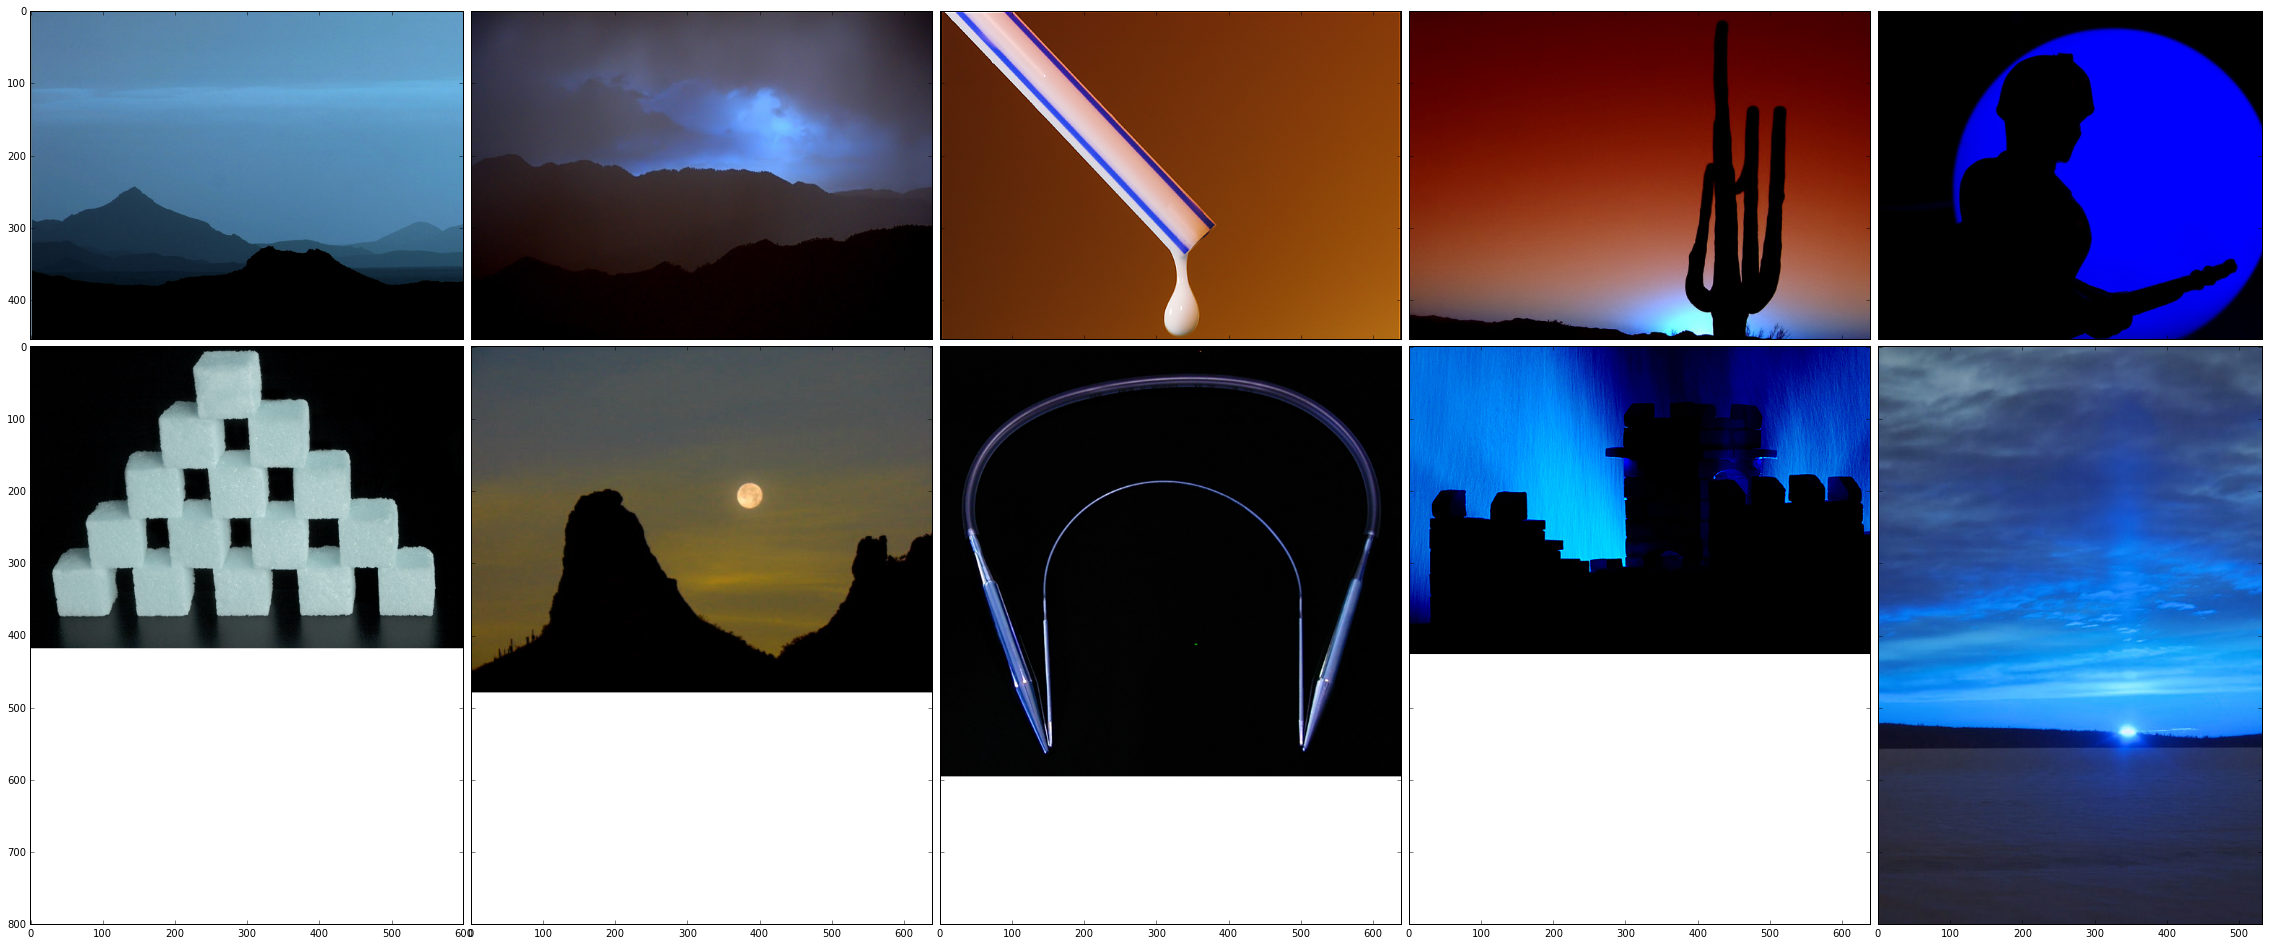

In [53]:
%matplotlib inline

import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(1, (40., 20.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 5),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

ava_path = "../dataset/AVA/data/"
ava_data_path = os.path.join(os.getcwd(), ava_path)
i = 0
for index, row in top_confidence_good.iterrows():
    filename = "{0}.jpg".format(index)

    filepath = os.path.join(ava_data_path, filename)
    image = cv2.imread(filepath)
    grid[i].imshow(image)
    i = i + 1
for index, row in top_confidence_bad.iterrows():
    filename = "{0}.jpg".format(index)

    filepath = os.path.join(ava_data_path, filename)
    image = cv2.imread(filepath)
    grid[i].imshow(image)
    i = i + 1

### Top 5 HIghest And Lowest Quality Images predicted by Finetuned VGG Network

In [49]:
vgg_output = store['outputVgg']
top_vgg_good = vgg_output.sort_values(by='vggscore', ascending=False)[:5]
top_vgg_bad = vgg_output.sort_values(by='vggscore', ascending=True)[:5]

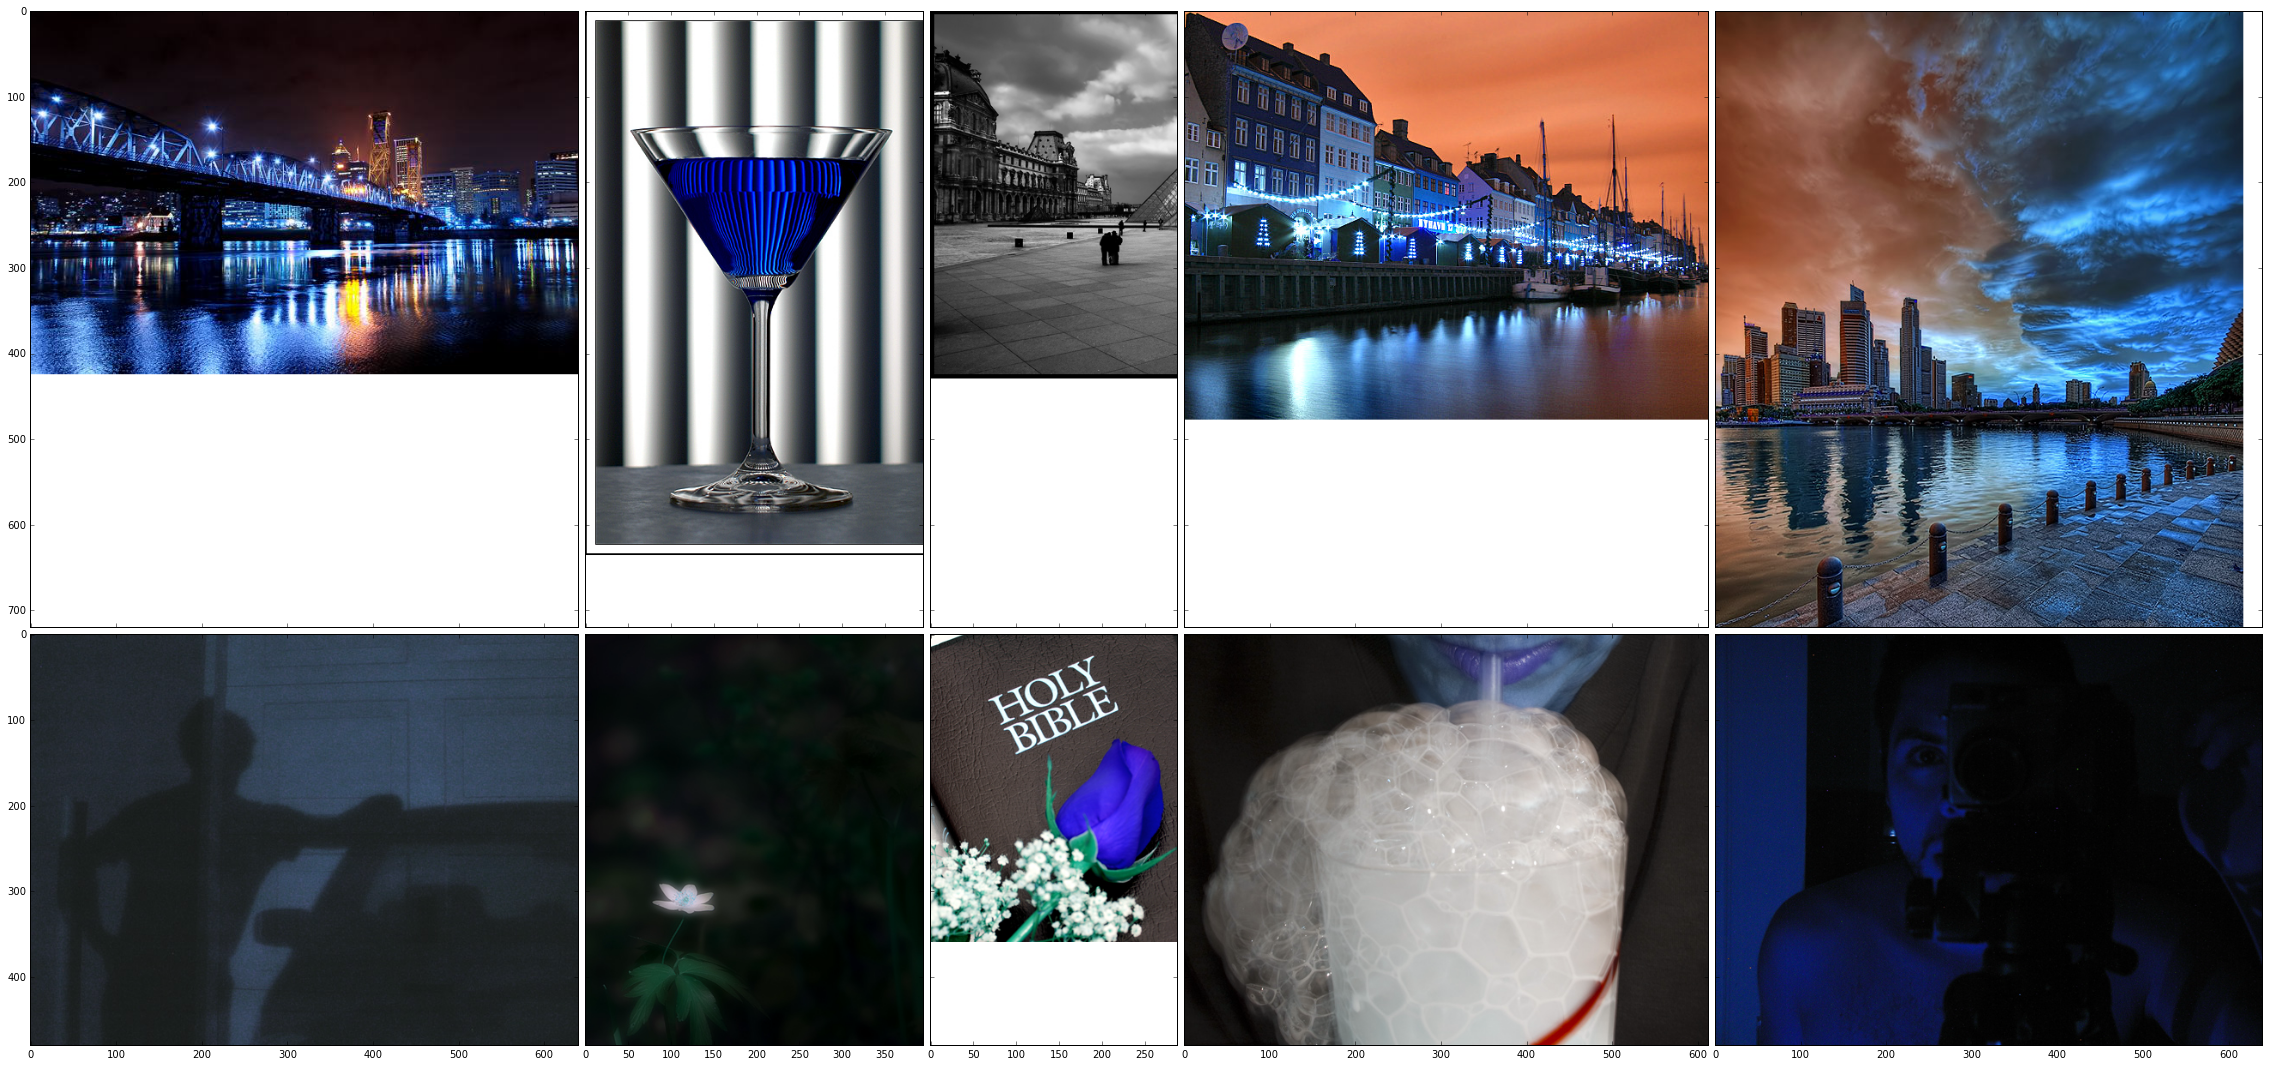

In [37]:
%matplotlib inline

import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(1, (40., 20.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 5),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

ava_path = "../dataset/AVA/data/"
ava_data_path = os.path.join(os.getcwd(), ava_path)
i = 0
for index, row in top_vgg_good.iterrows():
    filename = "{0}.jpg".format(index)

    filepath = os.path.join(ava_data_path, filename)
    image = cv2.imread(filepath)
    grid[i].imshow(image)
    i = i + 1
for index, row in top_vgg_bad.iterrows():
    filename = "{0}.jpg".format(index)

    filepath = os.path.join(ava_data_path, filename)
    image = cv2.imread(filepath)
    grid[i].imshow(image)
    i = i + 1